<a href="https://colab.research.google.com/github/kmonroyzm/kmonroyzm/blob/main/Harvard_HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python for Research Homework: Week 3, Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [ ]:
# DO NOT EDIT THIS CODE!
import os
import pandas as pd
import numpy as np
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

### Exercise 1

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast` and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions
- Read in the data as a pandas dataframe using `pd.read_csv`. Use the `index_col` argument to set the first column in the csv file as the index for the dataframe. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/Harvard/asset.csv'
hamlets = pd.read_csv(file_path, index_col=0)
num_translations = len(hamlets)

print("Número de traducciones de Hamlet:", num_translations)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de traducciones de Hamlet: 3


### Exercise 2

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe.

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [ ]:
import pandas as pd
from collections import Counter
language, text = hamlets.iloc[0]
counted_text = count_words_fast(text)
data = pd.DataFrame({
    'word': list(counted_text.keys()),
    'count': list(counted_text.values())
})
print(data.head())

# Enter your code here.
# Obtener el texto de la primera traducción de Hamlet
language, text = hamlets.iloc[0]

# Calcular la frecuencia de palabras usando count_words_fast()
counted_text = count_words_fast(text)

# Obtener el número de veces que aparece la palabra "Hamlet"
num_hamlet = counted_text.get("hamlet", 0)  # Si "hamlet" no está presente, devuelve 0

print("Número de veces que aparece la palabra 'Hamlet':", num_hamlet)

       word  count
0       the    935
1  tragedie      3
2        of    576
3    hamlet     97
4            45513
Número de veces que aparece la palabra 'Hamlet': 97


### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet.

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [ ]:
# write your code here!
import pandas as pd
from collections import Counter

# Suponiendo que 'hamlets' es tu DataFrame que contiene las traducciones de Hamlet
# y 'count_words_fast' es la función que cuenta las palabras rápidamente.

# Obtener el texto de la primera traducción de Hamlet
language, text = hamlets.iloc[0]

# Calcular la frecuencia de palabras usando count_words_fast()
counted_text = count_words_fast(text)

# Crear un DataFrame 'data' a partir del diccionario de frecuencia de palabras
data = pd.DataFrame({
    'word': list(counted_text.keys()),
    'count': list(counted_text.values())
})

# Agregar la columna de longitud ('length')
data['length'] = data['word'].apply(len)

# Agregar la columna de frecuencia ('frequency')
def categorize_frequency(count):
    if count > 10:
        return "frequent"
    elif count > 1:
        return "infrequent"
    else:
        return "unique"

data['frequency'] = data['count'].apply(categorize_frequency)

# Contar las palabras únicas (count == 1)
num_unique_words = len(data[data['frequency'] == 'unique'])

print("Número de palabras únicas en el texto:", num_unique_words)

Número de palabras únicas en el texto: 3348


### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe.

#### Instructions
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text (defined in Exercise 2).
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [ ]:
# write your code here!

import pandas as pd
from collections import Counter

# Suponiendo que 'hamlets' es tu DataFrame que contiene las traducciones de Hamlet
# y 'count_words_fast' es la función que cuenta las palabras rápidamente.

# Obtener el texto y el idioma de la primera traducción de Hamlet
language, text = hamlets.iloc[0]

# Calcular la frecuencia de palabras usando count_words_fast()
counted_text = count_words_fast(text)

# Crear un DataFrame 'data' a partir del diccionario de frecuencia de palabras
data = pd.DataFrame({
    'word': list(counted_text.keys()),
    'count': list(counted_text.values())
})

# Agregar la columna de longitud ('length')
data['length'] = data['word'].apply(len)

# Agregar la columna de frecuencia ('frequency')
def categorize_frequency(count):
    if count > 10:
        return "frequent"
    elif count > 1:
        return "infrequent"
    else:
        return "unique"

data['frequency'] = data['count'].apply(categorize_frequency)

# Agrupar por frecuencia y calcular estadísticas
grouped_data = data.groupby('frequency').agg({
    'length': 'mean',    # Promedio de longitud de palabra
    'count': 'sum'       # Total de palabras
}).reset_index()

# Renombrar columnas para que coincidan con las instrucciones
grouped_data.rename(columns={'length': 'mean_word_length', 'count': 'num_words'}, inplace=True)

# Añadir la columna de idioma
grouped_data['language'] = language

# Reordenar las columnas para que coincidan con las instrucciones
sub_data = grouped_data[['language', 'frequency', 'mean_word_length', 'num_words']]

# Calcular el promedio de longitud de palabra de las palabras infrecuentes
average_word_length_infrequent = sub_data.loc[sub_data['frequency'] == 'infrequent', 'mean_word_length'].values[0]

print("Promedio de longitud de palabra de las palabras infrecuentes:", average_word_length_infrequent)
print(sub_data)

Promedio de longitud de palabra de las palabras infrecuentes: 5.825242718446602
  language   frequency  mean_word_length  num_words
0  English    frequent          4.371517      65628
1  English  infrequent          5.825243       5060
2  English      unique          7.005675       3348


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [ ]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })

    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"

    data["length"] = data["word"].apply(len)

    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })

    return(sub_data)

# write your code here!
# Creamos un DataFrame vacío para acumular los resultados
grouped_data = pd.DataFrame(columns=["language", "frequency", "mean_word_length", "num_words"])

# Iteramos sobre cada fila de 'hamlets' para resumir cada traducción
for i in range(len(hamlets)):
    language, text = hamlets.iloc[i]  # Obtener idioma y texto
    sub_data = summarize_text(language, text)  # Resumir la traducción
    grouped_data = pd.concat([grouped_data, sub_data], ignore_index=True)  # Concatenar los resultados

# Pregunta 1: Promedio de longitud de palabra de las palabras frecuentes en la traducción alemana
average_word_length_frequent_german = grouped_data.loc[
    (grouped_data['language'] == 'German') & (grouped_data['frequency'] == 'frequent'),
    'mean_word_length'
].values[0]

print("Promedio de longitud de palabra de las palabras frecuentes en la traducción alemana:", average_word_length_frequent_german)

# Pregunta 2: Número de palabras frecuentes en la traducción portuguesa
num_frequent_words_portuguese = grouped_data.loc[
    (grouped_data['language'] == 'Portuguese') & (grouped_data['frequency'] == 'frequent'),
    'num_words'
].values[0]
print("Número de palabras frecuentes en la traducción portuguesa:", num_frequent_words_portuguese)

Promedio de longitud de palabra de las palabras frecuentes en la traducción alemana: 4.528052805280528
Número de palabras frecuentes en la traducción portuguesa: 261


### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

Text(0, 0.5, 'Number of Words')

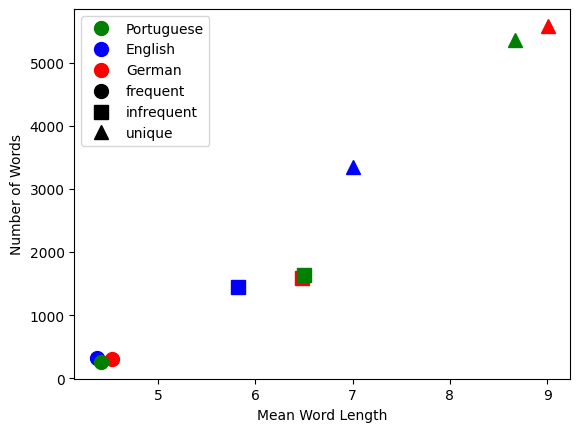

In [ ]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
# write your code to display the plot here!